In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
df = pd.read_csv('housing.csv')

In [133]:
# * Select only the features from above and fill in the missing values with 0.
actual_df = df[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']]
actual_df = actual_df.fillna(0)
actual_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [134]:
# * Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe. 
actual_df['rooms_per_household'] = actual_df['total_rooms'] / actual_df['households']
# * Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe. 
actual_df['bedrooms_per_room'] = actual_df['total_bedrooms'] / actual_df['total_rooms']
# * Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe. 
actual_df['population_per_household'] = actual_df['population'] / actual_df['households']

### Question 1
What is the most frequent observation (mode) for the column `ocean_proximity`?
Options:
* `NEAR BAY`
* `<1H OCEAN`
* `INLAND`
* `NEAR OCEAN`

In [135]:
actual_df['ocean_proximity'].mode()

0    <1H OCEAN
dtype: object

## Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe.


In [161]:
from sklearn.model_selection import train_test_split
X = actual_df.loc[:, ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', \
                      'households', 'median_income', 'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room', \
                     'population_per_household']]
y = actual_df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
X_val.shape

(4128, 12)

In [137]:
X_train.shape

(12384, 12)

In [138]:
X.shape

(20640, 12)

In [139]:
X_test.shape

(4128, 12)

### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:
* `total_bedrooms` and `households`
* `total_bedrooms` and `total_rooms`
* `population` and `households`
* `population_per_household` and `total_rooms`


In [140]:
X_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17244,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
8817,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
19686,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3545,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
17019,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456


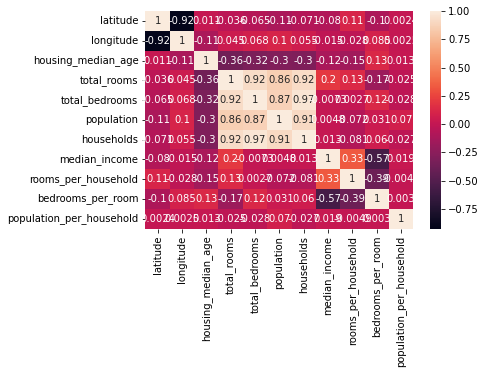

In [141]:
corrMatrix = actual_df.loc[:,  ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', \
                 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
# Answer: total_bedrooms and households

### Make `median_house_value` binary

* We need to turn the `median_house_value` variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.

In [162]:
y_train.dtype

dtype('float64')

In [163]:
y_train = y_train.to_frame()
y_train.head()

,median_house_value
17244,241400.0
8817,500001.0
19686,64100.0
3545,277200.0
17019,417000.0


In [164]:
y_train['median_house_value'].mean()

206807.7419250646

In [165]:
y_train['above_average'] = np.where(y_train['median_house_value'] > y_train['median_house_value'].mean(), 1, 0)
y_train.head() 

,median_house_value,above_average
17244,241400.0,1
8817,500001.0,1
19686,64100.0,0
3545,277200.0,1
17019,417000.0,1


In [166]:
y_val = y_val.to_frame().reset_index()
y_val['above_average'] = np.where(y_val['median_house_value'] > y_train['median_house_value'].mean(), 1, 0)
y_val.head() 

,index,median_house_value,above_average
0,2071,96700.0,0
1,2612,75500.0,0
2,10838,430900.0,1
3,4061,332600.0,1
4,10767,500001.0,1


### Question 3

* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using `round(score, 2)`

Options:
- 0.26
- 0
- 0.10
- 0.16

In [167]:
from sklearn.metrics import mutual_info_score

round(mutual_info_score(X_train['ocean_proximity'], y_train['above_average']), 2)

0.1


### Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:
- 0.60
- 0.72
- 0.84
- 0.95


In [168]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dict = X_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = X_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [169]:
X_val.shape

(4128, 16)

In [170]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train['above_average'])

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [171]:
# Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
y_pred = model.predict_proba(X_val)[:, 1]
decision = (y_pred >= 0.5)

df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = decision.astype(int)
df_pred['actual'] = y_val['above_average']

df_pred['correct'] = df_pred.prediction == df_pred.actual

df_pred.correct.mean()

0.8359980620155039

In [172]:
original_accuracy = df_pred.correct.mean()
round(original_accuracy, 2)

0.84

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `total_rooms`
   * `total_bedrooms` 
   * `population`
   * `households`

> **note**: the difference doesn't have to be positive

In [173]:
features_list = ['total_rooms', 'total_bedrooms','population','households']

In [174]:
for feature in features_list:
    X_train, X_test, y_train, y_test = train_test_split(X.loc[:, X.columns != feature], y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

    dv = DictVectorizer(sparse=False)
    train_dict = X_train.to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = X_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_train = y_train.to_frame()
    y_train['above_average'] = np.where(y_train['median_house_value'] > y_train['median_house_value'].mean(), 1, 0)
    y_val = y_val.to_frame().reset_index()
    y_val['above_average'] = np.where(y_val['median_house_value'] > y_train['median_house_value'].mean(), 1, 0)
    
    
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    # solver='lbfgs' is the default solver in newer version of sklearn
    # for older versions, you need to specify it explicitly
    model.fit(X_train, y_train['above_average'])
    
    # Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
    y_pred = model.predict_proba(X_val)[:, 1]
    decision = (y_pred >= 0.5)

    df_pred = pd.DataFrame()
    df_pred['probability'] = y_pred
    df_pred['prediction'] = decision.astype(int)
    df_pred['actual'] = y_val['above_average']

    df_pred['correct'] = df_pred.prediction == df_pred.actual

    acc = df_pred.correct.mean()
    print('feature = ', feature, 'accuracy = ', acc, 'diff = ', original_accuracy - acc)

feature =  total_rooms accuracy =  0.8362403100775194 diff =  -0.00024224806201555982
feature =  total_bedrooms accuracy =  0.8372093023255814 diff =  -0.001211240310077577
feature =  population accuracy =  0.8263081395348837 diff =  0.009689922480620172
feature =  households accuracy =  0.8340600775193798 diff =  0.0019379844961240345


Answer: total_rooms

### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'median_house_value'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`m
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

Options:
- 0
- 0.01
- 0.1
- 1
- 10



In [179]:
from sklearn.linear_model import Ridge

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

# Apply the logarithmic transformation to this column.
y = actual_df['median_house_value']
y = np.log1p(y)    
X_train, X_test, y_train, y_test = train_test_split(X.loc[:, X.columns != feature], y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

dv = DictVectorizer(sparse=False)
train_dict = X_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = X_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

alphas_list = [0, 0.01, 0.1, 1, 10]
for a in alphas_list: 
    model = Ridge(alpha=a, solver="sag", random_state=42)
    # solver='lbfgs' is the default solver in newer version of sklearn
    # for older versions, you need to specify it explicitly
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
#     round(rmse(y_val, y_pred), 3)
    print('alpha = ', a, 'round(rmse(y_val, y_pred), 3) = ', round(rmse(y_val, y_pred), 3))

alpha =  0 round(rmse(y_val, y_pred), 3) =  0.538
alpha =  0.01 round(rmse(y_val, y_pred), 3) =  0.538
alpha =  0.1 round(rmse(y_val, y_pred), 3) =  0.538
alpha =  1 round(rmse(y_val, y_pred), 3) =  0.538
alpha =  10 round(rmse(y_val, y_pred), 3) =  0.538


In [180]:
y_pred

array([12.11364724, 11.98221349, 11.99670958, ..., 12.18235953,
       12.26240677, 12.08939819])

In [181]:
y_val

2071     11.479379
2612     11.231901
10838    12.973634
4061     12.714699
10767    13.122367
           ...    
2285     11.303451
16904    12.751303
18139    12.748981
11471    12.868248
788      12.123783
Name: median_house_value, Length: 4128, dtype: float64